In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
sub=pd.read_csv("/content/sample_submission_HSqiq1Q.csv")
len(sub)

109541

In [0]:
tra=pd.read_csv("/content/train_fNxu4vz.csv")

In [4]:
len(tra)

164309

In [0]:
n=pd.read_csv("/content/test_fjtUOL8.csv")

In [6]:
len(n)

109541

In [0]:
train=pd.concat([tra,n])

In [8]:
train

,Loan_ID,Loan_Amount_Requested,Length_Employed,Home_Owner,Annual_Income,Income_Verified,Purpose_Of_Loan,Debt_To_Income,Inquiries_Last_6Mo,Months_Since_Deliquency,Number_Open_Accounts,Total_Accounts,Gender,Interest_Rate
0,10000001,"7,000",< 1 year,Rent,68000.0,not verified,car,18.37,0,NaN,9,14,Female,1.0
1,10000002,"30,000",4 years,Mortgage,NaN,VERIFIED - income,debt_consolidation,14.93,0,17.0,12,24,Female,3.0
2,10000003,"24,725",7 years,Mortgage,75566.4,VERIFIED - income source,debt_consolidation,15.88,0,NaN,12,16,Male,3.0
3,10000004,"16,000",< 1 year,NaN,56160.0,VERIFIED - income source,debt_consolidation,14.34,3,NaN,16,22,Male,3.0
4,10000005,"17,000",8 years,Own,96000.0,VERIFIED - income source,debt_consolidation,22.17,1,NaN,19,30,Female,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109536,10273846,"15,000",9 years,Mortgage,120000.0,VERIFIED - income,other,8.15,2,32.0,13,57,Male,NaN
109537,10273847,"9,600",10+ years,Mortgage,125000.0,not verified,credit_card,9.08,1,17.0,9,34,Male,NaN
109538,10273848,"2,000",5 years,Rent,37850.0,not verified,credit_card,11.60,0,NaN,10,11,Male,NaN
109539,10273849,"2,125",6 years,Rent,30000.0,not verified,other,24.88,0,NaN,5,6,Male,NaN


In [9]:
train.isnull().sum()

Loan_ID                         0
Loan_Amount_Requested           0
Length_Employed             12307
Home_Owner                  42060
Annual_Income               42000
Income_Verified                 0
Purpose_Of_Loan                 0
Debt_To_Income                  0
Inquiries_Last_6Mo              0
Months_Since_Deliquency    147238
Number_Open_Accounts            0
Total_Accounts                  0
Gender                          0
Interest_Rate              109541
dtype: int64

In [10]:
train["Length_Employed"].value_counts()

10+ years    88328
2 years      24420
3 years      21478
< 1 year     21133
5 years      18042
1 year       17336
4 years      16393
7 years      15444
6 years      15351
8 years      13115
9 years      10503
Name: Length_Employed, dtype: int64

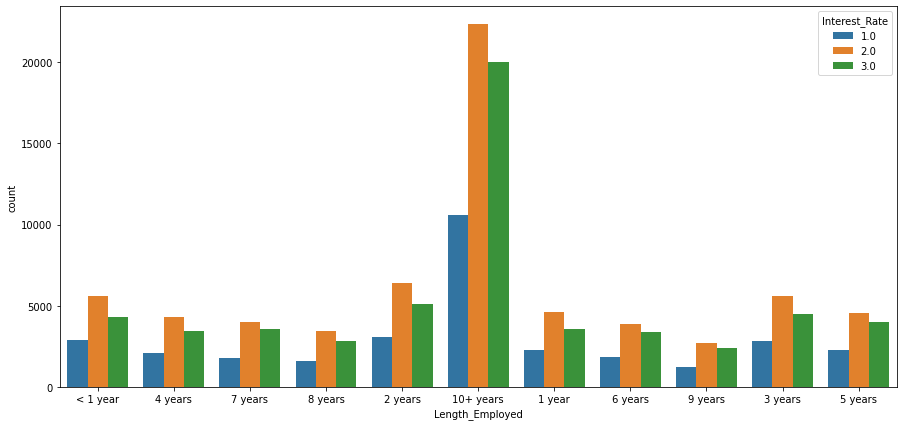

In [11]:
plt.figure(figsize=(15,7))
sns.countplot(x="Length_Employed",hue="Interest_Rate",data=train)

In [0]:
train["Length_Employed"]=train["Length_Employed"].map({"< 1 year":0,"1 year":1,"2 years":2,"3 years":3,"4 years":4,"5 years":5,"6 years":6,"7 years":7,"8 years":8, "9 years":9,"10+ years":10
})

In [0]:
train["Length_Employed"]=train["Length_Employed"].fillna(1)

In [0]:
train["Home_Owner"]=train["Home_Owner"].fillna("Mortgage")

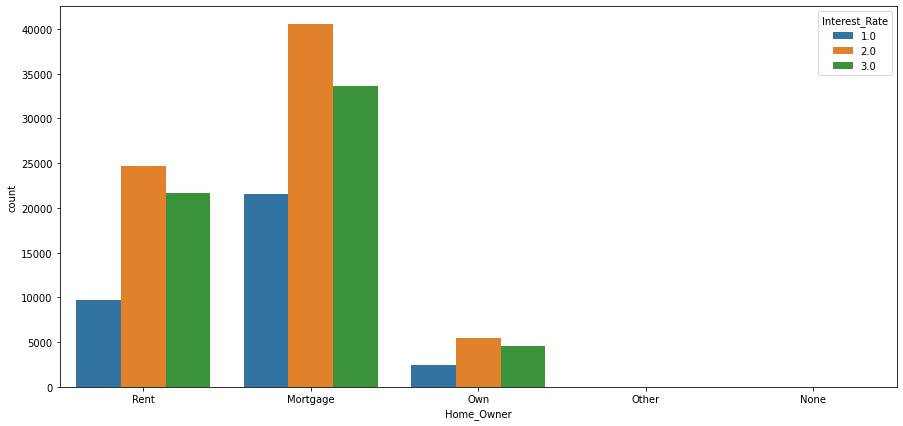

In [15]:
plt.figure(figsize=(15,7))
sns.countplot(x="Home_Owner",hue="Interest_Rate",data=train)

In [0]:
train["Annual_Income"]=train["Annual_Income"].fillna(train["Annual_Income"].median())

In [0]:
train["Months_Since_Deliquency"]=train["Months_Since_Deliquency"].fillna(9)

In [0]:
train.drop("Loan_ID",axis=1,inplace=True)

In [0]:
train["Number_Close_Account"]=train["Total_Accounts"]-train["Number_Open_Accounts"]

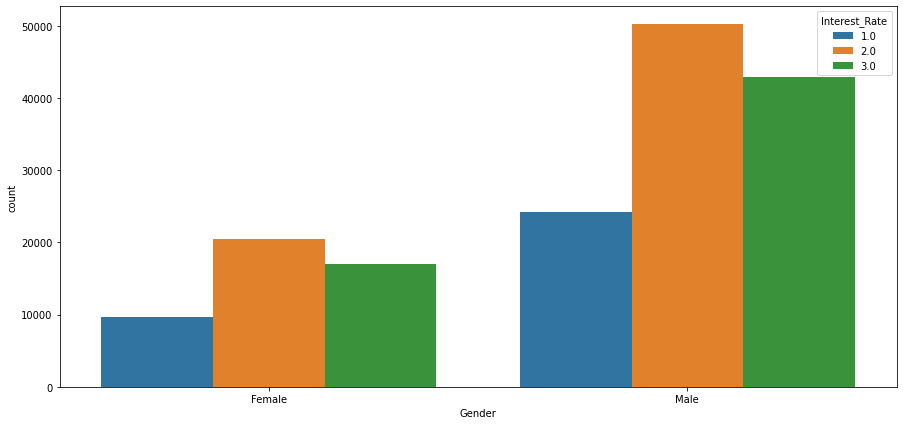

In [20]:
plt.figure(figsize=(15,7))
sns.countplot(x="Gender",hue="Interest_Rate",data=train)

In [0]:
tt=train

In [0]:
home=pd.get_dummies(tt["Home_Owner"])
iv=pd.get_dummies(tt["Income_Verified"])
pol=pd.get_dummies(tt["Purpose_Of_Loan"])
sex=pd.get_dummies(tt["Gender"])

In [0]:
train=pd.concat([tt,iv,pol,sex,home],axis=1)

In [0]:
train.drop(["Income_Verified","Purpose_Of_Loan","Gender","Home_Owner"],axis=1,inplace=True)

In [25]:
train

,Loan_Amount_Requested,Length_Employed,Annual_Income,Debt_To_Income,Inquiries_Last_6Mo,Months_Since_Deliquency,Number_Open_Accounts,Total_Accounts,Interest_Rate,Number_Close_Account,VERIFIED - income,VERIFIED - income source,not verified,car,credit_card,debt_consolidation,educational,home_improvement,house,major_purchase,medical,moving,other,renewable_energy,small_business,vacation,wedding,Female,Male,Mortgage,None,Other,Own,Rent
0,"7,000",0.0,68000.0,18.37,0,9.0,9,14,1.0,5,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
1,"30,000",4.0,63000.0,14.93,0,17.0,12,24,3.0,12,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0
2,"24,725",7.0,75566.4,15.88,0,9.0,12,16,3.0,4,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0
3,"16,000",0.0,56160.0,14.34,3,9.0,16,22,3.0,6,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0
4,"17,000",8.0,96000.0,22.17,1,9.0,19,30,1.0,11,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109536,"15,000",9.0,120000.0,8.15,2,32.0,13,57,NaN,44,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0
109537,"9,600",10.0,125000.0,9.08,1,17.0,9,34,NaN,25,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0
109538,"2,000",5.0,37850.0,11.60,0,9.0,10,11,NaN,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
109539,"2,125",6.0,30000.0,24.88,0,9.0,5,6,NaN,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1


In [0]:
train["Monthly_Income"]=train["Annual_Income"]/12

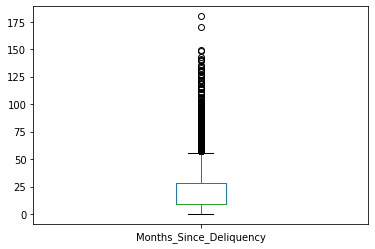

In [27]:
train["Months_Since_Deliquency"].plot.box()

In [0]:
upper_quartile=np.percentile(train["Months_Since_Deliquency"], 75)

In [0]:
lower_quartile = np.percentile(train["Months_Since_Deliquency"], 25)

In [0]:
iqr = upper_quartile - lower_quartile
upper_whisker = train["Months_Since_Deliquency"][train["Months_Since_Deliquency"]<=upper_quartile+1.5*iqr].max()
lower_whisker =train["Months_Since_Deliquency"][train["Months_Since_Deliquency"]>=lower_quartile-1.5*iqr].min()

In [31]:
upper_whisker

56.0

In [0]:

from sklearn.preprocessing import Binarizer

In [0]:
loan=[]
loan1=[]
for i in train["Loan_Amount_Requested"]:
  loan.append(i.replace(",",""))

for i in loan:
  loan1.append(int(i))

In [0]:
train["Loan_Amount_Requested"]=loan1

In [0]:
bn = Binarizer(threshold=56)

In [0]:
bn_trans = bn.transform([train['Months_Since_Deliquency']])[0]

In [0]:
train["bn_trans"]=bn_trans

In [0]:
train["Annual_Income"]=np.log(train["Annual_Income"])

In [0]:
train["Monthly_Income"]=np.log(train["Monthly_Income"])

In [40]:
train["Monthly_Income"].skew()

0.22350644961835014

In [0]:
y=train["Interest_Rate"]

In [42]:
y

0         1.0
1         3.0
2         3.0
3         3.0
4         1.0
         ... 
109536    NaN
109537    NaN
109538    NaN
109539    NaN
109540    NaN
Name: Interest_Rate, Length: 273850, dtype: float64

In [0]:
train.drop("Interest_Rate",axis=1,inplace=True)

In [44]:
train

,Loan_Amount_Requested,Length_Employed,Annual_Income,Debt_To_Income,Inquiries_Last_6Mo,Months_Since_Deliquency,Number_Open_Accounts,Total_Accounts,Number_Close_Account,VERIFIED - income,VERIFIED - income source,not verified,car,credit_card,debt_consolidation,educational,home_improvement,house,major_purchase,medical,moving,other,renewable_energy,small_business,vacation,wedding,Female,Male,Mortgage,None,Other,Own,Rent,Monthly_Income,bn_trans
0,7000,0.0,11.127263,18.37,0,9.0,9,14,5,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,8.642356,0.0
1,30000,4.0,11.050890,14.93,0,17.0,12,24,12,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,8.565983,0.0
2,24725,7.0,11.232767,15.88,0,9.0,12,16,4,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,8.747860,0.0
3,16000,0.0,10.935960,14.34,3,9.0,16,22,6,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,8.451053,0.0
4,17000,8.0,11.472103,22.17,1,9.0,19,30,11,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,8.987197,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109536,15000,9.0,11.695247,8.15,2,32.0,13,57,44,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,9.210340,0.0
109537,9600,10.0,11.736069,9.08,1,17.0,9,34,25,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,9.251162,0.0
109538,2000,5.0,10.541386,11.60,0,9.0,10,11,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,8.056480,0.0
109539,2125,6.0,10.308953,24.88,0,9.0,5,6,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,7.824046,0.0


In [0]:
from sklearn.preprocessing import StandardScaler

In [0]:

scaler=StandardScaler()

In [0]:
df=scaler.fit_transform(train)

In [0]:
cols=train.columns

In [0]:
train1=pd.DataFrame(df,columns=cols)

In [0]:
traindata=train[0:164309]
testdata=train[164309:]

In [0]:
y=y[0:164309]

In [0]:
from sklearn.metrics import f1_score

# MODEL

### DECISION TREE

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
X_train, X_test, y_train, y_test = train_test_split(traindata, y, random_state = 0) 

In [0]:
from sklearn.tree import DecisionTreeClassifier

In [0]:
dtree_model = DecisionTreeClassifier()

In [57]:
dtree_model.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [0]:
pred=dtree_model.predict(X_test)

In [59]:
f1_score(y_test,pred,pos_label='positive',average='micro')

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1321: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


0.4322508398656215

In [0]:
testpre=dtree_model.predict(testdata)

In [0]:
sub["Interest_Rate"]=testpre

In [0]:
sub.to_csv("knn.csv",index=False)

### NAIVE

In [0]:
from sklearn.naive_bayes import GaussianNB 

In [0]:
gnb = GaussianNB()

In [65]:
gnb.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [0]:
gnb_predictions = gnb.predict(X_test)

In [67]:
f1_score(y_test,gnb_predictions,pos_label='positive',average='micro')

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1321: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


0.5017771069672331

In [0]:
testpre=gnb.predict(testdata)

In [0]:
sub["Interest_Rate"]=testpre

In [0]:
sub.to_csv("gnb.csv",index=False)

### XGB

In [0]:
from xgboost import XGBClassifier

In [0]:
model = XGBClassifier()

In [73]:
model.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [0]:
val=model.predict(X_test)

In [75]:
f1_score(y_test,val,pos_label='positive',average='micro')

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1321: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


0.5334242173426165

In [0]:
testpre=model.predict(testdata)

In [0]:
sub["Interest_Rate"]=testpre

In [0]:
sub.to_csv("xbg.csv",index=False)

### LG-GBM

In [0]:
from lightgbm import LGBMClassifier

In [0]:
lgm = LGBMClassifier(random_state=27, max_depth=6, n_estimators=400)

In [81]:
lgm.fit(X_train,y_train)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=6,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=400, n_jobs=-1, num_leaves=31, objective=None,
               random_state=27, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [0]:
 val=lgm.predict(X_test)

In [83]:
f1_score(y_test,val,pos_label='positive',average='micro')

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1321: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


0.5422854082477239

In [0]:
testpre=lgm.predict(testdata)

In [0]:
lgbp=lgm.predict_proba(testdata)

In [86]:
testpre

array([2., 2., 3., ..., 2., 3., 2.])

In [0]:
sub["Interest_Rate"]=testpre

In [0]:
sub.to_csv("lgm-tunning3.csv",index=False)

### CATBOOST

In [89]:
pip install catboost

In [0]:
from catboost import CatBoostClassifier

In [0]:
cat = CatBoostClassifier(random_state=27, n_estimators=1000, max_depth=4, verbose=500)

In [92]:
cat.fit(X_train,y_train)

Learning rate set to 0.101146
0:	learn: 1.0818769	total: 116ms	remaining: 1m 55s
500:	learn: 0.9125135	total: 32s	remaining: 31.9s
999:	learn: 0.9017266	total: 1m 4s	remaining: 0us


In [0]:
val=cat.predict(X_test)

In [94]:
f1_score(y_test,val,pos_label='positive',average='micro')

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1321: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


0.5415064024538683

In [0]:
testpre=cat.predict(testdata)

In [0]:
catp=cat.predict_proba(testdata)

In [0]:
sub["Interest_Rate"]=testpre

In [0]:
sub.to_csv("cat.csv",index=False)

### EMSEMBLE1

In [0]:
preds = list()
cb_weight=0.6 # Catboost
lb_weight=0.4 # LGBM
for i, j in zip(catp, lgbp):
    xx = [(cb_weight * i[0]) + (lb_weight * j[0]),
          (cb_weight * i[1]) + (lb_weight * j[1]),
          (cb_weight * i[2]) + (lb_weight * j[2])]
    preds.append(xx)

In [0]:
testpre=np.argmax(preds,axis=1)

In [0]:
sub["Interest_Rate"]=testpre+1

In [0]:
sub.to_csv("ensembleX.csv",index=False)

### ENSEMBLE2


In [0]:
preds = list()
cb_weight=0.4 # Catboost
lb_weight=0.6 # LGBM
for i, j in zip(catp, lgbp):
    xx = [(cb_weight * i[0]) + (lb_weight * j[0]),
          (cb_weight * i[1]) + (lb_weight * j[1]),
          (cb_weight * i[2]) + (lb_weight * j[2])]
    preds.append(xx)

In [0]:
testpre=np.argmax(preds,axis=1)

In [0]:
sub["Interest_Rate"]=testpre+1

In [0]:
sub.to_csv("ensembleXX.csv",index=False)

### Tunning


In [0]:
from sklearn.model_selection import cross_val_score

In [108]:
cross_val_score(CatBoostClassifier(random_state=27, n_estimators=1000, max_depth=4, verbose=500),traindata, y)

Learning rate set to 0.10148
0:	learn: 1.0819196	total: 80.7ms	remaining: 1m 20s
500:	learn: 0.9123595	total: 34.2s	remaining: 34.1s
999:	learn: 0.9013846	total: 1m 8s	remaining: 0us
Learning rate set to 0.10148
0:	learn: 1.0817082	total: 69.8ms	remaining: 1m 9s
500:	learn: 0.9123372	total: 34.2s	remaining: 34.1s
999:	learn: 0.9016112	total: 1m 8s	remaining: 0us
Learning rate set to 0.10148
0:	learn: 1.0816646	total: 69.8ms	remaining: 1m 9s
500:	learn: 0.9124298	total: 34.4s	remaining: 34.3s
999:	learn: 0.9018324	total: 1m 8s	remaining: 0us
Learning rate set to 0.10148
0:	learn: 1.0817073	total: 70.2ms	remaining: 1m 10s
500:	learn: 0.9134677	total: 34.4s	remaining: 34.2s
999:	learn: 0.9023038	total: 1m 8s	remaining: 0us
Learning rate set to 0.10148
0:	learn: 1.0819221	total: 69.5ms	remaining: 1m 9s
500:	learn: 0.9130639	total: 34.5s	remaining: 34.3s
999:	learn: 0.9023350	total: 1m 8s	remaining: 0us


array([0.54141562, 0.54162863, 0.54552371, 0.54381961, 0.54201029])

In [0]:
from scipy.stats import randint as sp_randint
from scipy.stats import uniform as sp_uniform

In [0]:
params ={'num_leaves': sp_randint(6, 50), 
          'min_child_samples': sp_randint(100, 500), 
          'min_child_weight': [1e-5, 1e-3, 1e-2, 1e-1, 1, 1e1, 1e2, 1e3, 1e4],
           'subsample': sp_uniform(loc=0.2, scale=0.8), 
           'colsample_bytree': sp_uniform(loc=0.4, scale=0.6),
          'reg_alpha': [0, 1e-1, 1, 2, 5, 7, 10, 50, 100],
           'reg_lambda': [0, 1e-1, 1, 5, 10, 20, 50, 100],
           'max_depth': [5,6,7,8],
         
         }

In [0]:
from sklearn.model_selection import RandomizedSearchCV

In [0]:
rand=RandomizedSearchCV(LGBMClassifier(),params,n_iter=3,cv=3)

In [151]:
rand.fit(X_train,y_train)

RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=LGBMClassifier(boosting_type='gbdt',
                                            class_weight=None,
                                            colsample_bytree=1.0,
                                            importance_type='split',
                                            learning_rate=0.1, max_depth=-1,
                                            min_child_samples=20,
                                            min_child_weight=0.001,
                                            min_split_gain=0.0,
                                            n_estimators=100, n_jobs=-1,
                                            num_leaves=31, objective=None,
                                            random_state=None, reg_alpha=0.0,
                                            reg_lambda=0.0, sile...
                                                             100.0, 1000.0,
                                                 

In [0]:
df=pd.DataFrame(rand.cv_results_)

In [157]:
df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_colsample_bytree,param_max_depth,param_min_child_samples,param_min_child_weight,param_num_leaves,param_reg_alpha,param_reg_lambda,param_subsample,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,3.522654,0.026711,1.113364,0.012719,0.580947,8,129,0.001,29,5,5,0.572303,"{'colsample_bytree': 0.5809465511806868, 'max_...",0.536772,0.538257,0.538915,0.537982,0.000896,1
1,3.470629,0.031266,1.060114,0.006006,0.889418,6,124,0.01,35,100,10,0.757855,"{'colsample_bytree': 0.8894178033792156, 'max_...",0.530613,0.529859,0.531806,0.530759,0.000802,3
2,4.053335,0.028582,1.253075,0.012328,0.914315,7,270,1e-05,39,10,20,0.647069,"{'colsample_bytree': 0.9143154681430202, 'max_...",0.536870,0.537113,0.535993,0.536659,0.000481,2


In [158]:
df[["param_num_leaves","param_min_child_samples","param_min_child_weight","param_subsample","param_colsample_bytree","param_reg_alpha","param_reg_lambda","param_max_depth","mean_test_score"]]

,param_num_leaves,param_min_child_samples,param_min_child_weight,param_subsample,param_colsample_bytree,param_reg_alpha,param_reg_lambda,param_max_depth,mean_test_score
0,29,129,0.001,0.572303,0.580947,5,5,8,0.537982
1,35,124,0.01,0.757855,0.889418,100,10,6,0.530759
2,39,270,1e-05,0.647069,0.914315,10,20,7,0.536659


In [0]:
new=LGBMClassifier(num_leaves=29,min_child_samples=129,min_child_weight=0.001,subsample=0.572303,colsample_bytree=0.580947,reg_alpha=5,reg_lambda=5,max_depth=8)

In [160]:
new.fit(X_train,y_train)

LGBMClassifier(boosting_type='gbdt', class_weight=None,
               colsample_bytree=0.580947, importance_type='split',
               learning_rate=0.1, max_depth=8, min_child_samples=129,
               min_child_weight=0.001, min_split_gain=0.0, n_estimators=100,
               n_jobs=-1, num_leaves=29, objective=None, random_state=None,
               reg_alpha=5, reg_lambda=5, silent=True, subsample=0.572303,
               subsample_for_bin=200000, subsample_freq=0)

In [0]:
val=new.predict(X_test)

In [162]:
f1_score(y_test,val,pos_label='positive',average='micro')

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1321: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


0.541798529626564

In [0]:
predd=new.predict(testdata)

In [0]:
sub["Interest_Rate"]=predd

In [0]:
sub.to_csv("lgb-rand-tunning.csv",index=False)

In [0]:
params = {'max_depth':[4,5,6,7,8],
          'n_estimators':[10,100,1000]
          }

In [0]:
catrand=RandomizedSearchCV(CatBoostClassifier(),params,n_iter=3,cv=3)

In [194]:
catrand.fit(X_train,y_train)

Streaming output truncated to the last 5000 lines.
5:	learn: 1.0237175	total: 348ms	remaining: 57.6s
6:	learn: 1.0164484	total: 400ms	remaining: 56.7s
7:	learn: 1.0105905	total: 455ms	remaining: 56.4s
8:	learn: 1.0049232	total: 508ms	remaining: 56s
9:	learn: 0.9991590	total: 581ms	remaining: 57.5s
10:	learn: 0.9943446	total: 640ms	remaining: 57.5s
11:	learn: 0.9906685	total: 697ms	remaining: 57.4s
12:	learn: 0.9870733	total: 749ms	remaining: 56.8s
13:	learn: 0.9839863	total: 800ms	remaining: 56.3s
14:	learn: 0.9811423	total: 858ms	remaining: 56.3s
15:	learn: 0.9777985	total: 912ms	remaining: 56.1s
16:	learn: 0.9752717	total: 965ms	remaining: 55.8s
17:	learn: 0.9732408	total: 1.02s	remaining: 55.5s
18:	learn: 0.9709420	total: 1.07s	remaining: 55.1s
19:	learn: 0.9691047	total: 1.12s	remaining: 55s
20:	learn: 0.9673228	total: 1.18s	remaining: 54.8s
21:	learn: 0.9656769	total: 1.23s	remaining: 54.5s
22:	learn: 0.9636667	total: 1.29s	remaining: 54.7s
23:	learn: 0.9621374	total: 1.36s	remain

RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=<catboost.core.CatBoostClassifier object at 0x7ff122757a90>,
                   iid='deprecated', n_iter=3, n_jobs=None,
                   param_distributions={'max_depth': [4, 5, 6, 7, 8],
                                        'n_estimators': [10, 100, 1000]},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
                   return_train_score=False, scoring=None, verbose=0)

In [0]:
df=pd.DataFrame(catrand.cv_results_)

In [197]:
df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.716019,0.002552,0.020076,0.000476,10,6,"{'n_estimators': 10, 'max_depth': 6}",0.526085,0.525282,0.526913,0.526093,0.000666,3
1,53.816895,0.039144,0.158065,0.002879,1000,6,"{'n_estimators': 1000, 'max_depth': 6}",0.538379,0.538574,0.541227,0.539393,0.001299,1
2,62.399611,0.231370,0.173575,0.005267,1000,7,"{'n_estimators': 1000, 'max_depth': 7}",0.536772,0.535580,0.534825,0.535726,0.000802,2


In [0]:
new1=CatBoostClassifier(learning_rate=0.05,max_depth=6,n_estimators=1000)

In [228]:
new1.fit(X_train,y_train)

0:	learn: 1.0888594	total: 77.2ms	remaining: 1m 17s
1:	learn: 1.0803929	total: 151ms	remaining: 1m 15s
2:	learn: 1.0722967	total: 222ms	remaining: 1m 13s
3:	learn: 1.0651889	total: 301ms	remaining: 1m 14s
4:	learn: 1.0586495	total: 380ms	remaining: 1m 15s
5:	learn: 1.0525622	total: 455ms	remaining: 1m 15s
6:	learn: 1.0468570	total: 531ms	remaining: 1m 15s
7:	learn: 1.0414345	total: 606ms	remaining: 1m 15s
8:	learn: 1.0364761	total: 680ms	remaining: 1m 14s
9:	learn: 1.0318785	total: 764ms	remaining: 1m 15s
10:	learn: 1.0276028	total: 839ms	remaining: 1m 15s
11:	learn: 1.0236496	total: 921ms	remaining: 1m 15s
12:	learn: 1.0195734	total: 1s	remaining: 1m 15s
13:	learn: 1.0159048	total: 1.07s	remaining: 1m 15s
14:	learn: 1.0125784	total: 1.15s	remaining: 1m 15s
15:	learn: 1.0096005	total: 1.23s	remaining: 1m 15s
16:	learn: 1.0064569	total: 1.3s	remaining: 1m 15s
17:	learn: 1.0037602	total: 1.37s	remaining: 1m 15s
18:	learn: 1.0011336	total: 1.46s	remaining: 1m 15s
19:	learn: 0.9987413	tota

In [0]:
val=new1.predict(X_test)

In [230]:
f1_score(y_test,val,pos_label='positive',average='micro')

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1321: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


0.5415307463849263

In [0]:
predd=new1.predict(testdata)

In [0]:
sub["Interest_Rate"]=predd

In [0]:
sub.to_csv("cattt.05.csv",index=False)